# Axis bank Data Analysys-2

## Import Necessary libraries

In [1]:
import pandas as pd
import yfinance as yf
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
import matplotlib.pyplot as plt

## Stock data download

In [2]:
# Define the start and end dates for data download
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2024, 11, 26)
symbol = 'AXISBANK.NS'

In [3]:
# Download historical stock data using yfinance
stk_data = yf.download(symbol, start=start, end=end)

[*********************100%***********************]  1 of 1 completed


In [4]:
stk_data

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS,AXISBANK.NS
Date,,,,,,
2021-06-01,741.917419,745.150024,754.000000,741.150024,753.549988,6660243
2021-06-02,733.802734,737.000000,745.299988,734.200012,744.799988,9973043
2021-06-03,747.393616,750.650024,752.250000,739.000000,743.000000,8170508
2021-06-04,738.830872,742.049988,759.900024,740.099976,751.000000,10336011
2021-06-07,747.841614,751.099976,753.950012,741.500000,743.099976,6986728
...,...,...,...,...,...,...
2024-11-18,1126.199951,1126.199951,1135.000000,1121.550049,1131.199951,9474971
2024-11-19,1133.949951,1133.949951,1139.000000,1122.050049,1130.000000,19225966


## Axis bank closing price over time

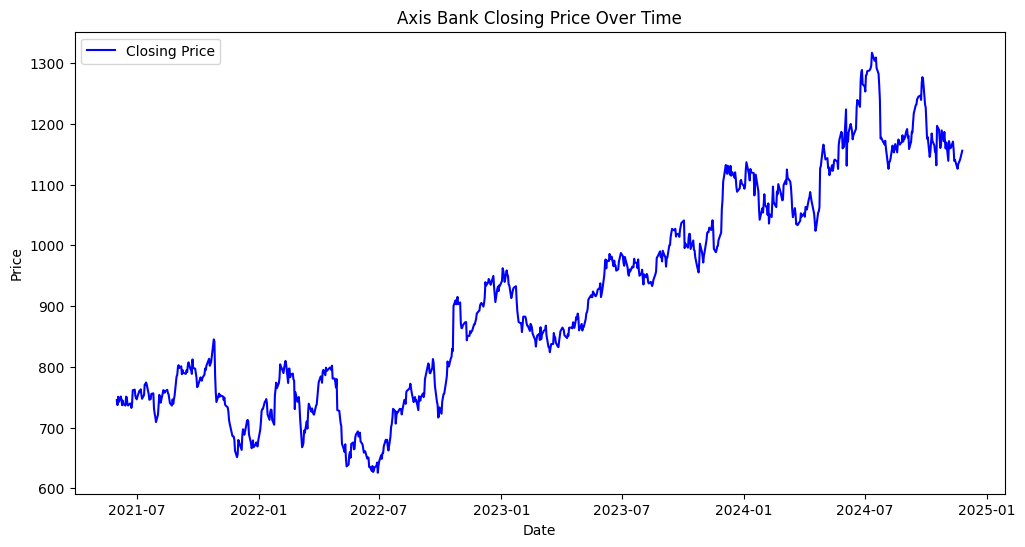

In [5]:
#Plotting Closing Price over Time
plt.figure(figsize=(12, 6))
plt.plot(stk_data['Close'], label='Closing Price', color='blue')
plt.title('Axis Bank Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

## Daily Return Analysys

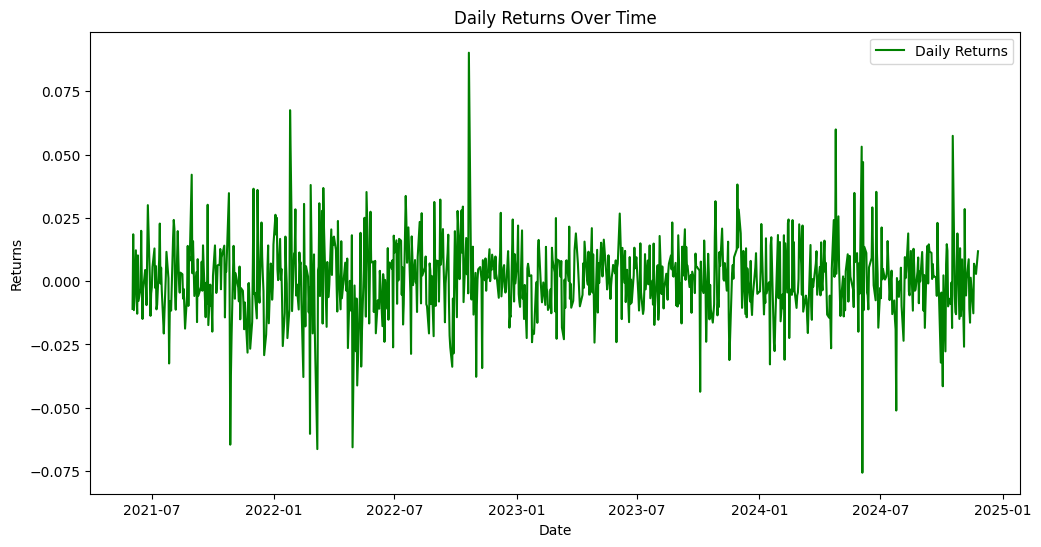

In [6]:
#Daily Returns Calculation
stk_data['Daily Returns'] = stk_data['Close'].pct_change()
plt.figure(figsize=(12, 6))
plt.plot(stk_data['Daily Returns'], label='Daily Returns', color='green')
plt.title('Daily Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

In [7]:
stk_data['Daily Returns']

Date
2021-06-01         NaN
2021-06-02   -0.010937
2021-06-03    0.018521
2021-06-04   -0.011457
2021-06-07    0.012196
                ...   
2024-11-18   -0.012711
2024-11-19    0.006882
2024-11-21    0.004586
2024-11-22    0.002853
2024-11-25    0.011817
Name: Daily Returns, Length: 862, dtype: float64

In [8]:
# Calculate daily returns
stk_data['Daily_Returns'] = stk_data['Close'].pct_change()

# Find the highest daily return
highest_daily_return = stk_data['Daily_Returns'].max()
highest_return_date = stk_data['Daily_Returns'].idxmax()

print(f"The highest daily return is {highest_daily_return:.4f} on {highest_return_date}")


The highest daily return is 0.0903 on 2022-10-21 00:00:00


In [9]:
# Sort daily returns in descending order
sorted_daily_returns = stk_data['Daily_Returns'].sort_values(ascending=False)

# Display the top 10 highest daily returns
print("Top 10 highest daily returns:")
print(sorted_daily_returns.head(10))


Top 10 highest daily returns:
Date
2022-10-21    0.090271
2022-01-25    0.067556
2024-04-25    0.059958
2024-10-18    0.057428
2024-06-03    0.053134
2024-06-05    0.047072
2021-08-30    0.042065
2023-11-29    0.038192
2022-02-25    0.037998
2022-03-16    0.036812
Name: Daily_Returns, dtype: float64


## High Low Price Difference Analysys

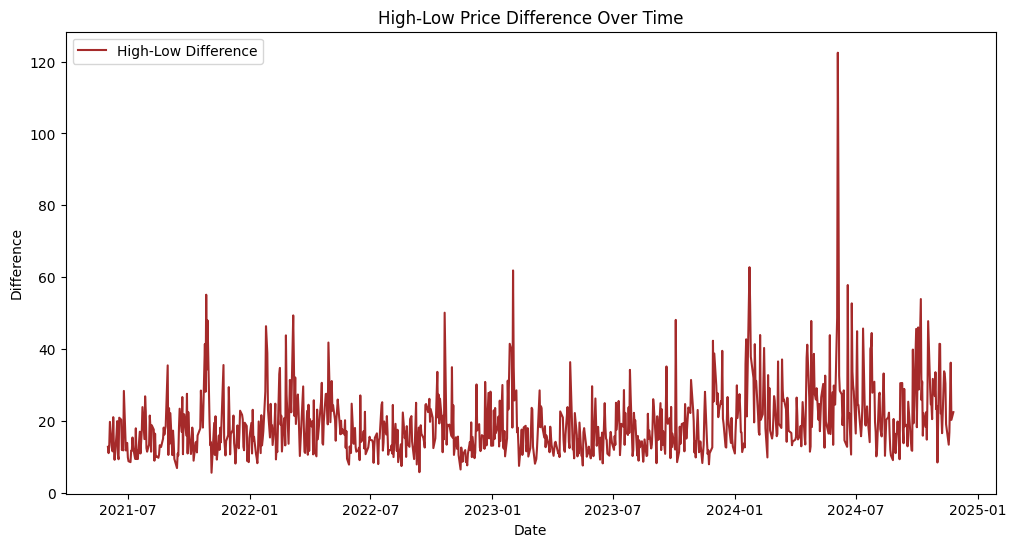

In [10]:
# High-Low Price Difference
stk_data['High_Low_Diff'] = stk_data['High'] - stk_data['Low']
plt.figure(figsize=(12, 6))
plt.plot(stk_data['High_Low_Diff'], label='High-Low Difference', color='brown')
plt.title('High-Low Price Difference Over Time')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.legend()
plt.show()

In [11]:
stk_data['High_Low_Diff']

Date
2021-06-01    12.849976
2021-06-02    11.099976
2021-06-03    13.250000
2021-06-04    19.800049
2021-06-07    12.450012
                ...    
2024-11-18    13.449951
2024-11-19    16.949951
2024-11-21    36.250000
2024-11-22    20.349976
2024-11-25    22.500000
Name: High_Low_Diff, Length: 862, dtype: float64

In [12]:
# Sort the High-Low differences in descending order
sorted_diff = stk_data[['High_Low_Diff']].sort_values(by='High_Low_Diff', ascending=False)

# Display the top 10 highest differences
print("Top 10 highest High-Low price differences:")
print(sorted_diff.head(10))

Top 10 highest High-Low price differences:
Price      High_Low_Diff
Ticker                  
Date                    
2024-06-04    122.449951
2024-06-05     82.300049
2024-01-23     62.799927
2023-02-01     61.900024
2024-06-19     57.849976
2021-10-27     55.149963
2024-10-07     53.949951
2024-06-25     52.750000
2024-01-24     52.299927
2022-10-21     50.150024


## Price Gap Analysys

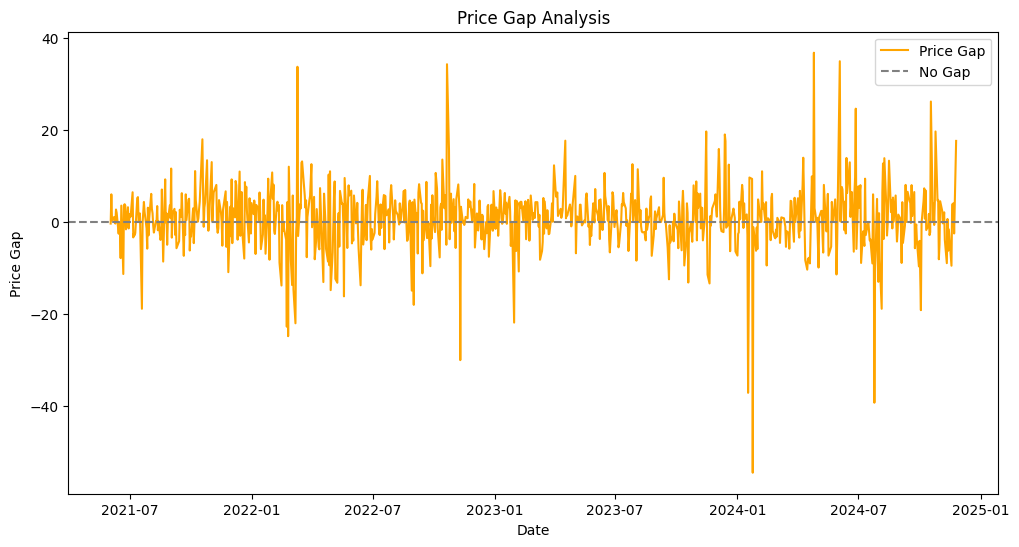

In [13]:
stk_data['Price Gap'] = stk_data['Open'] - stk_data['Close'].shift(1)

plt.figure(figsize=(12, 6))
plt.plot(stk_data['Price Gap'], label='Price Gap', color='orange')
plt.axhline(0, linestyle='--', color='gray', label='No Gap')
plt.title('Price Gap Analysis')
plt.xlabel('Date')
plt.ylabel('Price Gap')
plt.legend()
plt.show()


In [14]:
stk_data['Price Gap']

Date
2021-06-01          NaN
2021-06-02    -0.350037
2021-06-03     6.000000
2021-06-04     0.349976
2021-06-07     1.049988
                ...    
2024-11-18    -9.500000
2024-11-19     3.800049
2024-11-21     4.050049
2024-11-22    -2.500000
2024-11-25    17.599976
Name: Price Gap, Length: 862, dtype: float64

In [15]:
# Detect the day with the highest price gap
highest_gap_day = stk_data.loc[stk_data['Price Gap'].idxmax()]
print("Day with the Highest Price Gap:")
print(highest_gap_day)

# Sort the data by 'Price Gap' in ascending to descending order
sorted_data = stk_data.sort_values(by='Price Gap', ascending=False)
print("\nData Sorted by Price Gap (Descending):")
print(sorted_data[['Open', 'Close', 'Price Gap']].head())

# To reverse the order to ascending:
sorted_data_asc = stk_data.sort_values(by='Price Gap', ascending=True)
print("\nData Sorted by Price Gap (Ascending):")
print(sorted_data_asc[['Open', 'Close', 'Price Gap']].head())


Day with the Highest Price Gap:
Price          Ticker     
Adj Close      AXISBANK.NS    1.126131e+03
Close          AXISBANK.NS    1.127000e+03
High           AXISBANK.NS    1.133950e+03
Low            AXISBANK.NS    1.086100e+03
Open           AXISBANK.NS    1.100000e+03
Volume         AXISBANK.NS    4.613630e+07
Daily Returns                 5.995768e-02
Daily_Returns                 5.995768e-02
High_Low_Diff                 4.784998e+01
Price Gap                     3.675000e+01
Name: 2024-04-25 00:00:00, dtype: float64

Data Sorted by Price Gap (Descending):
Price              Open        Close  Price Gap
Ticker      AXISBANK.NS  AXISBANK.NS           
Date                                           
2024-04-25  1100.000000  1127.000000  36.750000
2024-06-03  1197.050049  1223.900024  34.900024
2022-10-21   860.099976   900.400024  34.250000
2022-03-10   707.900024   694.950012  33.700012
2024-10-18  1158.000000  1196.849976  26.150024

Data Sorted by Price Gap (Ascending):
Price 

## Average Closing Price

<Figure size 1000x500 with 0 Axes>

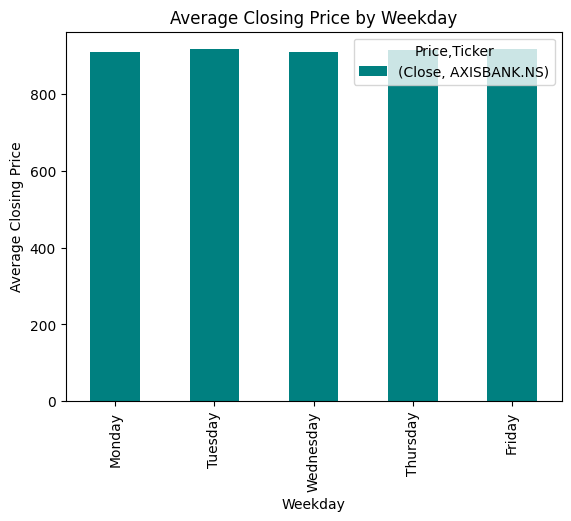

In [16]:
stk_data['Weekday'] = stk_data.index.weekday
weekday_data = stk_data.groupby('Weekday')['Close'].mean()
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

plt.figure(figsize=(10, 5))
weekday_data.index = weekday_labels
weekday_data.plot(kind='bar', color='teal', title='Average Closing Price by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Average Closing Price')
plt.show()


In [17]:
stk_data['Weekday']

Date
2021-06-01    1
2021-06-02    2
2021-06-03    3
2021-06-04    4
2021-06-07    0
             ..
2024-11-18    0
2024-11-19    1
2024-11-21    3
2024-11-22    4
2024-11-25    0
Name: Weekday, Length: 862, dtype: int32

In [18]:
weekday_data

Price,Close
Ticker,AXISBANK.NS
Monday,909.793637
Tuesday,916.615699
Wednesday,910.662499
Thursday,913.652855
Friday,916.545295


## Year and Monthly Average Closing Price


Yearly Average Closing Prices:
Price         Close
Ticker  AXISBANK.NS
Year               
2021     746.696620
2022     763.608265
2023     952.213264
2024    1150.271039


<Figure size 1000x500 with 0 Axes>

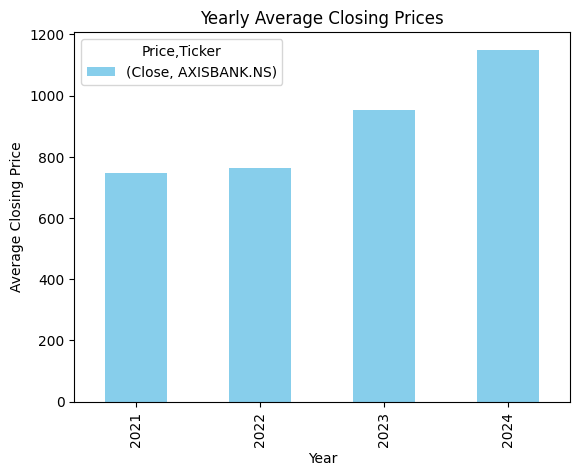


Monthly Average Closing Prices:
Price        Close
Ticker AXISBANK.NS
Month             
1       921.996774
2       908.813109
3       868.848336
4       912.893744
5       907.352345
6       881.484521
7       919.776476
8       906.291664
9       944.744046
10      953.617898
11      922.668419
12      898.225381


<Figure size 1000x500 with 0 Axes>

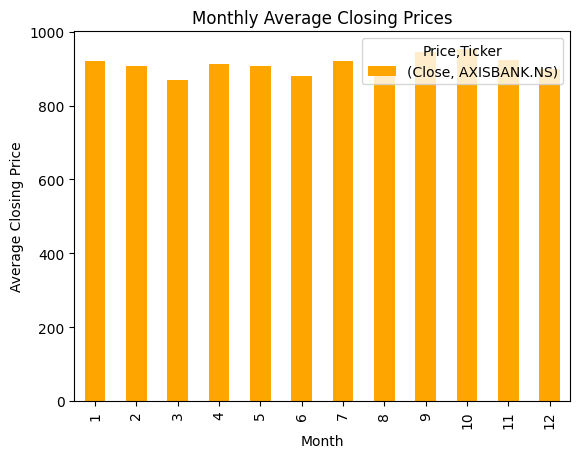

In [19]:
stk_data['Year'] = stk_data.index.year
stk_data['Month'] = stk_data.index.month

# Yearly Average Closing Price
yearly_data = stk_data.groupby('Year')['Close'].mean()
print("\nYearly Average Closing Prices:")
print(yearly_data)

plt.figure(figsize=(10, 5))
yearly_data.plot(kind='bar', color='skyblue', title='Yearly Average Closing Prices')
plt.xlabel('Year')
plt.ylabel('Average Closing Price')
plt.show()

# Monthly Average Closing Price
monthly_data = stk_data.groupby('Month')['Close'].mean()
print("\nMonthly Average Closing Prices:")
print(monthly_data)

plt.figure(figsize=(10, 5))
monthly_data.plot(kind='bar', color='orange', title='Monthly Average Closing Prices')
plt.xlabel('Month')
plt.ylabel('Average Closing Price')
plt.show()


## Volume Analysys

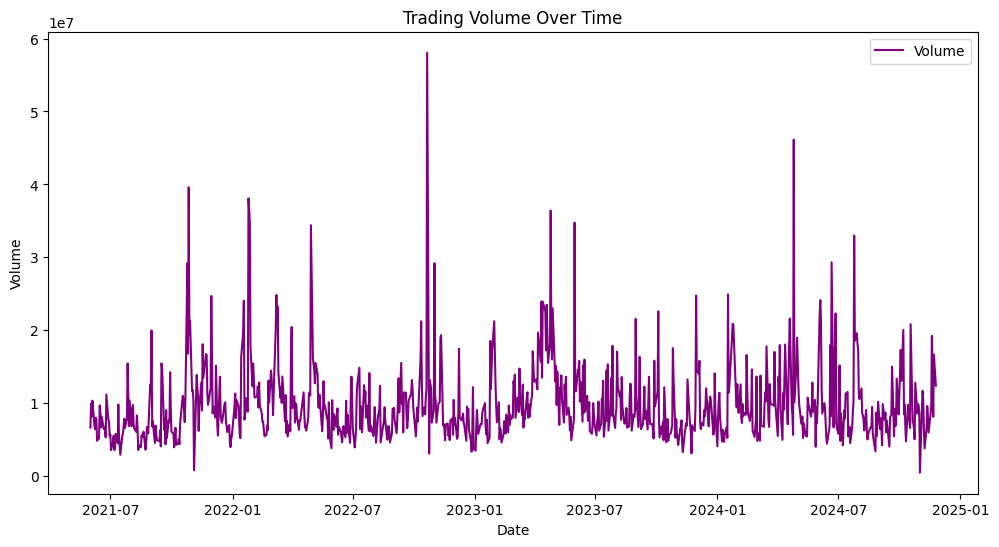

Day with the Highest Volume:
Price        Adj Close       Close        High         Low        Open  \
Ticker     AXISBANK.NS AXISBANK.NS AXISBANK.NS AXISBANK.NS AXISBANK.NS   
Date                                                                     
2022-10-21  897.858521  900.400024       906.0  855.849976  860.099976   

Price           Volume Daily Returns Daily_Returns High_Low_Diff Price Gap  \
Ticker     AXISBANK.NS                                                       
Date                                                                         
2022-10-21    58057724      0.090271      0.090271     50.150024     34.25   

Price      Weekday  Year Month  
Ticker                          
Date                            
2022-10-21       4  2022    10  


In [20]:
# Plotting Volume over Time
plt.figure(figsize=(12, 6))
plt.plot(stk_data['Volume'], label='Volume', color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# Day with the highest volume
highest_volume_day = stk_data.loc[stk_data['Volume'].idxmax()]
print("Day with the Highest Volume:")
print(highest_volume_day)


## Volatility Analysys

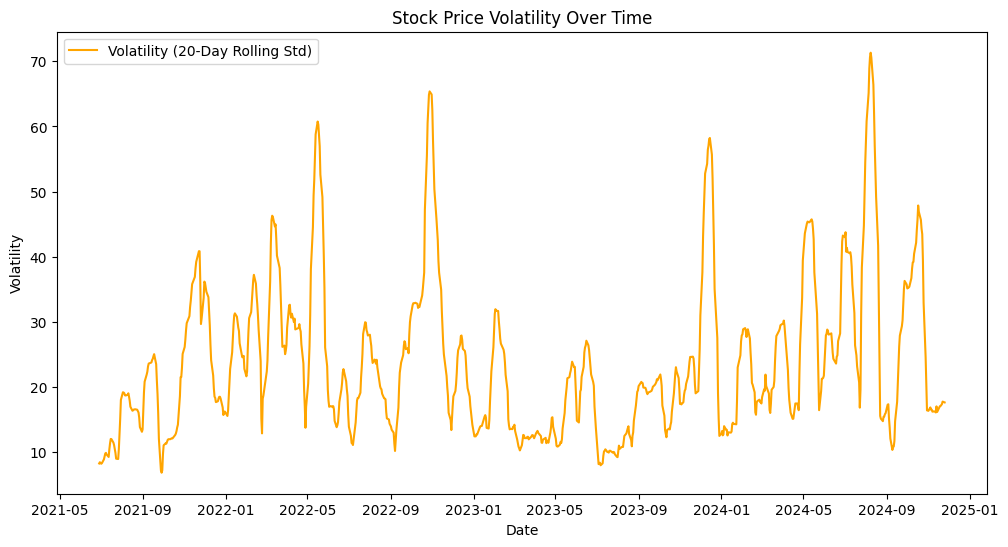

In [21]:
stk_data['Volatility'] = stk_data['Close'].rolling(window=20).std()

plt.figure(figsize=(12, 6))
plt.plot(stk_data['Volatility'], label='Volatility (20-Day Rolling Std)', color='orange')
plt.title('Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()


## Daily and Monthly Average returns


Yearly Average Returns (%):
Year
2021   -0.052916
2022    0.145442
2023    0.074558
2024    0.034289
Name: Daily_Return, dtype: float64


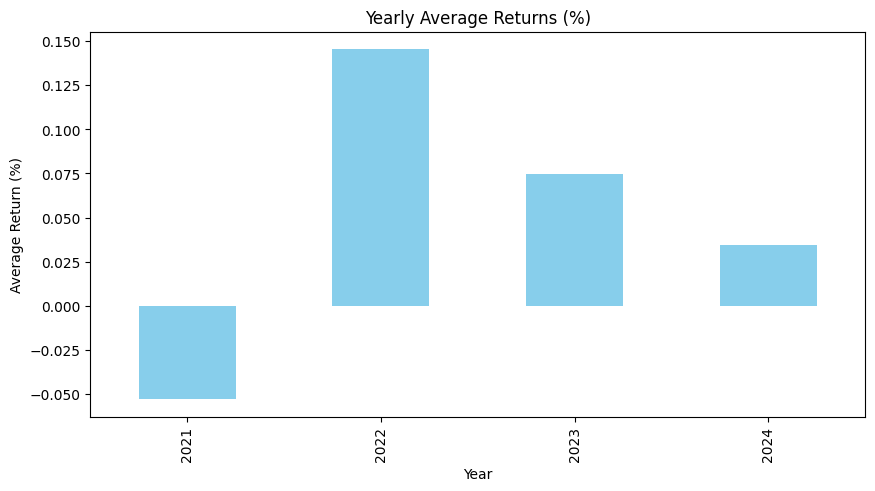


Monthly Average Returns (%):
Month
1     0.062198
2    -0.093980
3     0.040635
4     0.131044
5     0.005783
6     0.125323
7    -0.039377
8     0.207708
9     0.079837
10    0.099863
11   -0.046828
12    0.155796
Name: Daily_Return, dtype: float64


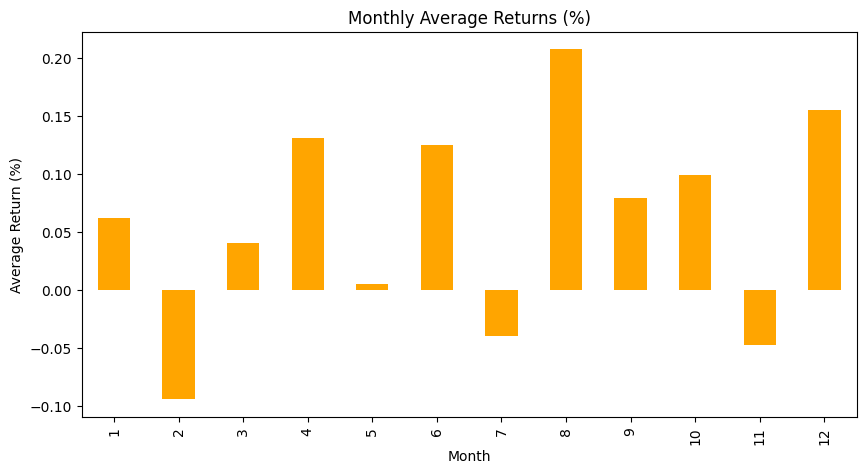

In [22]:
# Calculate daily returns
stk_data['Daily_Return'] = stk_data['Close'].pct_change()

# Extract Year and Month
stk_data['Year'] = stk_data.index.year
stk_data['Month'] = stk_data.index.month

# Yearly Average Returns
yearly_return = stk_data.groupby('Year')['Daily_Return'].mean() * 100  # Convert to percentage
print("\nYearly Average Returns (%):")
print(yearly_return)

plt.figure(figsize=(10, 5))
yearly_return.plot(kind='bar', color='skyblue', title='Yearly Average Returns (%)')
plt.xlabel('Year')
plt.ylabel('Average Return (%)')
plt.show()

# Monthly Average Returns
monthly_return = stk_data.groupby('Month')['Daily_Return'].mean() * 100  # Convert to percentage
print("\nMonthly Average Returns (%):")
print(monthly_return)

plt.figure(figsize=(10, 5))
monthly_return.plot(kind='bar', color='orange', title='Monthly Average Returns (%)')
plt.xlabel('Month')
plt.ylabel('Average Return (%)')
plt.show()

## Consecutive Gainers and Losers

In [23]:
stk_data['Gain/Loss'] = (stk_data['Close'] > stk_data['Close'].shift(1)).astype(int)
stk_data['Streak'] = stk_data['Gain/Loss'] * (stk_data['Gain/Loss'].groupby((stk_data['Gain/Loss'] != stk_data['Gain/Loss'].shift()).cumsum()).cumcount() + 1)

longest_gain_streak = stk_data[stk_data['Gain/Loss'] == 1]['Streak'].max()
longest_loss_streak = stk_data[stk_data['Gain/Loss'] == 0]['Streak'].max()
print(f"Longest Gain Streak: {longest_gain_streak} days")
print(f"Longest Loss Streak: {longest_loss_streak} days")


Longest Gain Streak: 10 days
Longest Loss Streak: 0 days


## Yearly Return Analysys

<Figure size 1200x600 with 0 Axes>

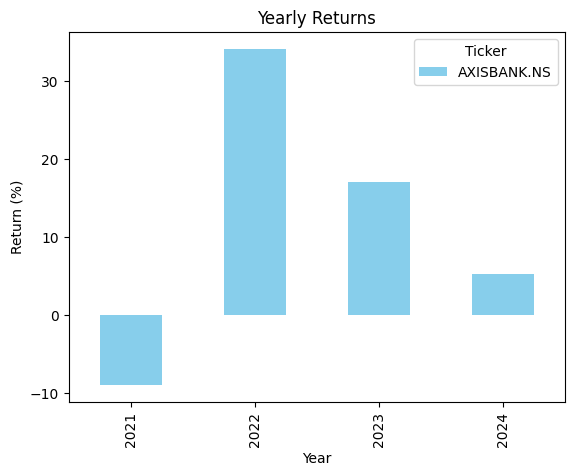

In [24]:
stk_data['Year'] = stk_data.index.year
yearly_returns = stk_data.groupby('Year')['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

plt.figure(figsize=(12, 6))
yearly_returns.plot(kind='bar', color='skyblue')
plt.title('Yearly Returns')
plt.xlabel('Year')
plt.ylabel('Return (%)')
plt.show()


In [25]:
stk_data['Year']

Date
2021-06-01    2021
2021-06-02    2021
2021-06-03    2021
2021-06-04    2021
2021-06-07    2021
              ... 
2024-11-18    2024
2024-11-19    2024
2024-11-21    2024
2024-11-22    2024
2024-11-25    2024
Name: Year, Length: 862, dtype: int32

In [26]:
yearly_returns

Ticker,AXISBANK.NS
Year,
2021,-8.937802
2022,34.092056
2023,17.066703
2024,5.302002


## Monthly Return Analysys

In [27]:
# Extract year and month from the index
stk_data['Year'] = stk_data.index.year
stk_data['Month'] = stk_data.index.month

# Calculate monthly returns
monthly_returns = stk_data.groupby(['Year', 'Month'])['Close'].apply(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

# Reset index for better readability
monthly_returns = monthly_returns.reset_index()
monthly_returns.rename(columns={'Close': 'Return (%)'}, inplace=True)

# Print the monthly returns
print("Monthly Returns:")
print(monthly_returns)

Monthly Returns:
Ticker  Year  Month  AXISBANK.NS
0       2021      6     0.422729
1       2021      7    -5.030476
2       2021      8     9.061911
3       2021      9    -4.049322
4       2021     10    -3.404286
5       2021     11   -12.853054
6       2021     12    -0.154501
7       2022      1    11.014578
8       2022      2    -5.051797
9       2022      3     1.452852
10      2022      4    -5.932479
11      2022      5    -5.795004
12      2022      6    -7.178777
13      2022      7    12.547556
14      2022      8     2.832514
15      2022      9    -1.471479
16      2022     10    25.354549
17      2022     11     3.383998
18      2022     12     3.308074
19      2023      1    -7.434155
20      2023      2    -1.533978
21      2023      3    -0.768656
22      2023      4    -0.532035
23      2023      5     5.076661
24      2023      6     7.366532
25      2023      7    -2.871393
26      2023      8     1.416812
27      2023      9     4.595664
28      2023     10    -5.

## Candle Body Size overtime

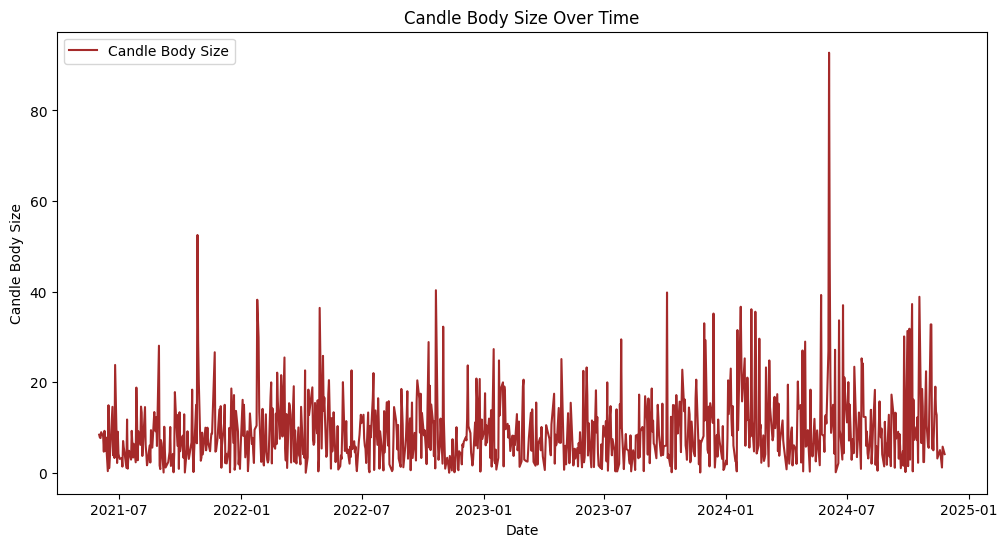

In [28]:
stk_data['Candle Body'] = abs(stk_data['Close'] - stk_data['Open'])

plt.figure(figsize=(12, 6))
plt.plot(stk_data['Candle Body'], label='Candle Body Size', color='brown')
plt.title('Candle Body Size Over Time')
plt.xlabel('Date')
plt.ylabel('Candle Body Size')
plt.legend()
plt.show()


In [29]:
stk_data['Candle Body']

Date
2021-06-01    8.399963
2021-06-02    7.799988
2021-06-03    7.650024
2021-06-04    8.950012
2021-06-07    8.000000
                ...   
2024-11-18    5.000000
2024-11-19    3.949951
2024-11-21    1.150024
2024-11-22    5.750000
2024-11-25    4.099976
Name: Candle Body, Length: 862, dtype: float64

In [30]:
# Get the top 10 rows with the highest candle body
top_10_candle_bodies = stk_data.nlargest(10, 'Candle Body')[['Candle Body', 'Open', 'Close', 'High', 'Low']]

print("Top 10 Highest Candle Bodies:")
print(top_10_candle_bodies)

Top 10 Highest Candle Bodies:
Price      Candle Body         Open        Close         High          Low
Ticker                  AXISBANK.NS  AXISBANK.NS  AXISBANK.NS  AXISBANK.NS
Date                                                                      
2024-06-04   92.750000  1224.000000  1131.250000  1224.000000  1101.550049
2021-10-27   52.500000   840.000000   787.500000   840.799988   785.650024
2024-06-05   46.500000  1138.000000  1184.500000  1193.000000  1110.699951
2022-10-21   40.300049   860.099976   900.400024   906.000000   855.849976
2023-10-04   39.799988  1035.349976   995.549988  1037.000000   988.849976
2024-05-23   39.250000  1126.000000  1165.250000  1169.650024  1125.750000
2024-10-18   38.849976  1158.000000  1196.849976  1203.849976  1156.050049
2022-01-25   38.200012   714.000000   752.200012   755.000000   708.599976
2024-10-07   37.250000  1182.949951  1145.699951  1184.849976  1130.900024
2024-06-25   37.000000  1234.449951  1271.449951  1278.750000  1226.00